<a href="https://colab.research.google.com/github/dudubouneto/Disc_FluxoVacinacao/blob/main/NumPostos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Discretização das variáveis/Data/final_novo_ibge_sp - final_novo_ibge_sp_cpy.csv')
data = data[['Município', 'Codigo_IBGE', 'Postos vacinação']]
data.head()

,Município,Codigo_IBGE,Postos vacinação
0,ADAMANTINA,3500105,4
1,ADOLFO,3500204,1
2,AGUAÍ,3500303,5
3,ÁGUAS DA PRATA,3500402,1
4,ÁGUAS DE LINDÓIA,3500501,4


In [ ]:
data['Postos vacinação'].describe()

count    645.00000
mean       6.40000
std       27.71065
min        0.00000
25%        1.00000
50%        2.00000
75%        6.00000
max      665.00000
Name: Postos vacinação, dtype: float64

##Proposta de discretização por quartis

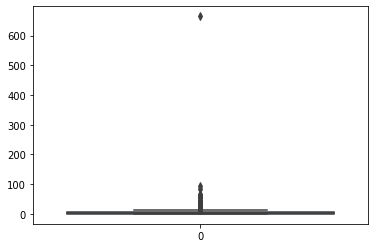

In [ ]:
# plt.figure(figsize=(5, 10))
sns.boxplot(data=data['Postos vacinação'])

Verificando a quantidade de outliers:

In [ ]:
IQR = data['Postos vacinação'].quantile(.75) - data['Postos vacinação'].quantile(.25)
# como o número mínimo de postos é zero, vamos desconsiderar o limite inferior
sup = data['Postos vacinação'].quantile(.75) + 1.5 * IQR

In [ ]:
data[data['Postos vacinação'] > sup].count()

Município           70
Codigo_IBGE         70
Postos vacinação    70
dtype: int64

Como temos 70 outliers (para 645 dados), vamos continuar com a discretização por quartis

In [ ]:
bins = [0,
        data['Postos vacinação'].quantile(.25),
        data['Postos vacinação'].quantile(.5),
        data['Postos vacinação'].quantile(.75),
        sup,
        data['Postos vacinação'].max()]
labels = ['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Muito Alto']
data['Classificação #Postos'] = pd.cut(data['Postos vacinação'], bins=bins, labels=labels)
data

,Município,Codigo_IBGE,Postos vacinação,Classificação #Postos
0,ADAMANTINA,3500105,4,Médio
1,ADOLFO,3500204,1,Muito Baixo
2,AGUAÍ,3500303,5,Médio
3,ÁGUAS DA PRATA,3500402,1,Muito Baixo
4,ÁGUAS DE LINDÓIA,3500501,4,Médio
...,...,...,...,...
640,VOTORANTIM,3557006,4,Médio
641,VOTUPORANGA,3557105,18,Muito Alto
642,ZACARIAS,3557154,1,Muito Baixo
643,CHAVANTES,3557204,3,Médio


###Histograma da distribuição

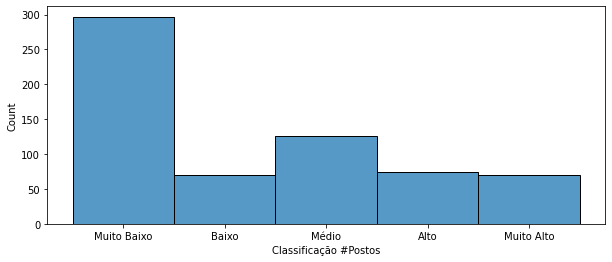

In [ ]:
plt.figure(figsize=(10, 4))
sns.histplot(data['Classificação #Postos'])